#📌 Extracción

In [1]:
import pandas as pd
import json

# --- 1. Ruta al archivo JSON subido ---
archivo_json = "/content/TelecomX_Data.json"

# --- 2. Cargar JSON ---
with open(archivo_json, 'r') as f:
    datos_json = json.load(f)

# --- 3. Convertir a DataFrame ---
df_clientes = pd.DataFrame(datos_json)

# --- 4. Mostrar las primeras filas ---
print("Primeras filas del DataFrame:")
display(df_clientes.head())

# --- 5. Información general de las columnas y tipos de datos ---
print("\nInformación general del DataFrame:")
df_clientes.info()

# --- 6. Verificar cantidad de valores nulos por columna ---
print("\nCantidad de valores nulos por columna:")
print(df_clientes.isnull().sum())


Primeras filas del DataFrame:


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Cantidad de valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


#🔧 Transformación

In [5]:
import pandas as pd

# --- 1. Exploración inicial del dataset ---

print("Columnas del dataset:")
print(df_clientes.columns.tolist())

print("\nTipos de datos por columna:")
print(df_clientes.dtypes)

# --- 2. Comprobación de incoherencias en los datos ---

# Valores nulos
print("\nValores nulos por columna:")
print(df_clientes.isnull().sum())

# Duplicados por customerID
duplicados = df_clientes.duplicated(subset='customerID').sum()
print(f"\nCantidad de duplicados por customerID: {duplicados}")

# Valores únicos de columnas categóricas
categoricas = ['Churn', 'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

print("\nValores únicos por columna categórica:")
for col in categoricas:
    try:
        print(f"\n{col}: {df_clientes[col].unique()}")
    except Exception as e:
        print(f"Error revisando {col}: {e}")

# --- 3. Manejo de inconsistencias y limpieza ---

# Reemplazar valores vacíos en Churn
df_clientes['Churn'] = df_clientes['Churn'].replace('', 'No')

# Convertir Charges.Total a float (errores se convierten en NaN)
df_clientes['Charges.Total'] = pd.to_numeric(df_clientes['Charges.Total'], errors='coerce')

# Si hubiera duplicados, eliminarlos
if duplicados > 0:
    df_clientes = df_clientes.drop_duplicates(subset='customerID')
    print(f"\nSe eliminaron {duplicados} duplicados.")

# --- 4. Creación de la columna 'Cuentas_Diarias' ---

# Calcular facturación diaria aproximada
# Asumimos que cada mes tiene 30 días
df_clientes['Cuentas_Diarias'] = df_clientes['Charges.Monthly'] / 30

# --- 5. Información final del DataFrame limpio ---
print("\nInformación general del DataFrame limpio:")
df_clientes.info()

print("\nPrimeras filas del DataFrame:")
df_clientes.head()


Columnas del dataset:
['customerID', 'Churn', 'customer', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

Tipos de datos por columna:
customerID           object
Churn                object
customer             object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object

Valores nulos por columna:
customerID           0
Churn                0
customer             0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity   

,customerID,Churn,customer,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...",Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...",Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...",Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...",Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...",Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

=== ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS ===



,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7256.000000,7267.000000
mean,64.720098,2280.634213,2.157337
std,30.129572,2268.632997,1.004319
min,18.250000,18.800000,0.608333
25%,35.425000,400.225000,1.180833
50%,70.300000,1391.000000,2.343333
75%,89.875000,3785.300000,2.995833
max,118.750000,8684.800000,3.958333


Observaciones iniciales:
- Charges.Monthly: valor promedio mensual que pagan los clientes.
- Charges.Total: total gastado por cliente durante su permanencia.
- Cuentas_Diarias: promedio diario basado en Charges.Monthly, útil para análisis de hábitos de consumo.
- Notarás posibles valores máximos muy altos, que podrían indicar clientes de larga permanencia o servicios adicionales.


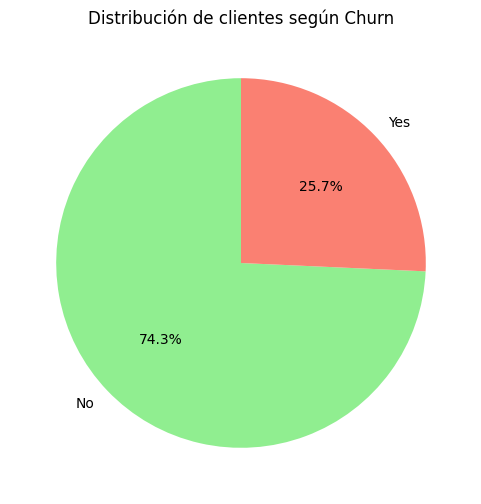

Insight: 1869 clientes se dieron de baja (25.72%). Esto representa la proporción de riesgo de evasión en la base de datos.


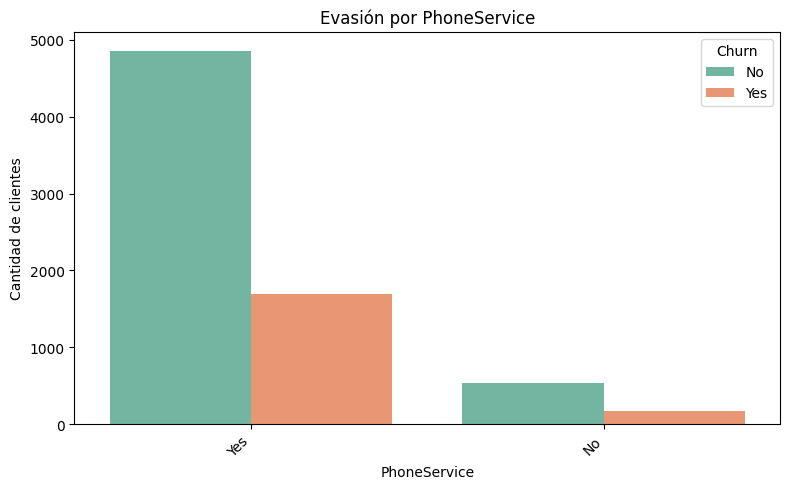

Insight: Se observa cómo la evasión se distribuye según PhoneService. Por ejemplo, ciertos contratos o métodos de pago pueden tener mayor proporción de Churn, lo que ayuda a priorizar acciones.


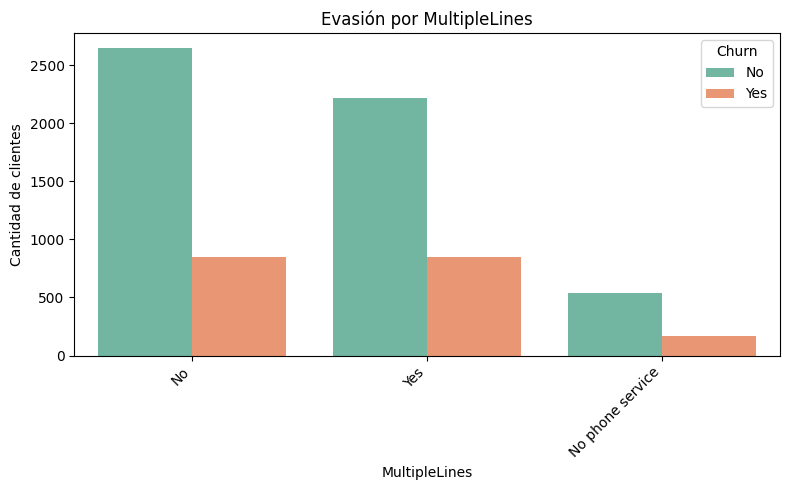

Insight: Se observa cómo la evasión se distribuye según MultipleLines. Por ejemplo, ciertos contratos o métodos de pago pueden tener mayor proporción de Churn, lo que ayuda a priorizar acciones.


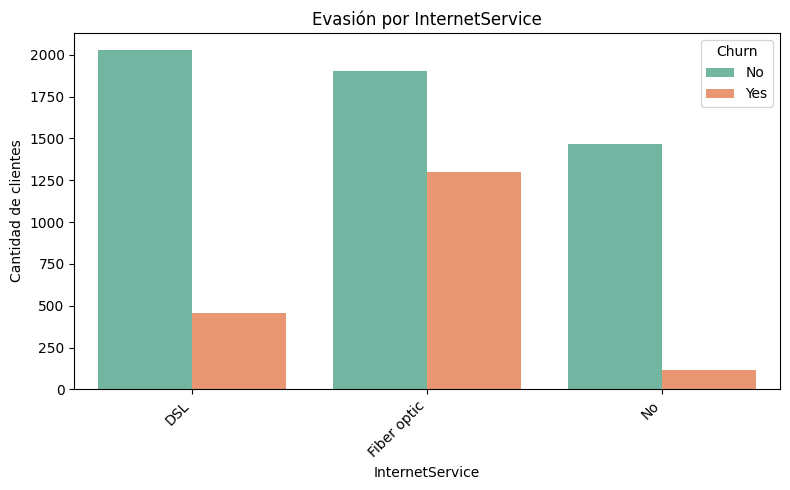

Insight: Se observa cómo la evasión se distribuye según InternetService. Por ejemplo, ciertos contratos o métodos de pago pueden tener mayor proporción de Churn, lo que ayuda a priorizar acciones.


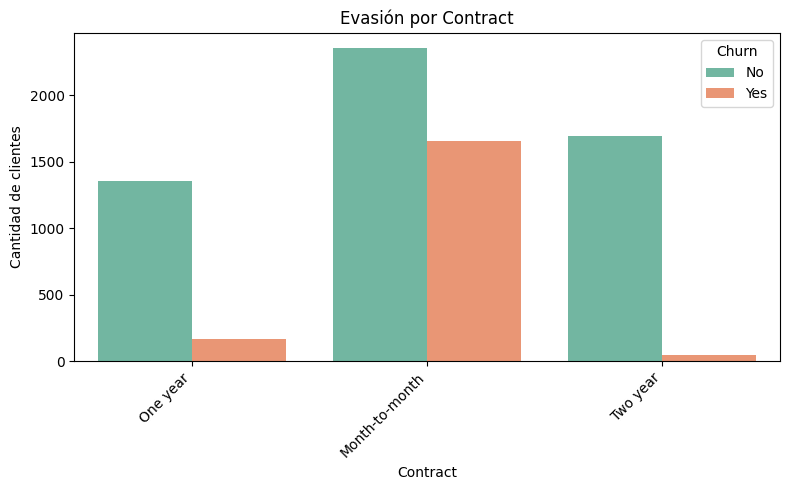

Insight: Se observa cómo la evasión se distribuye según Contract. Por ejemplo, ciertos contratos o métodos de pago pueden tener mayor proporción de Churn, lo que ayuda a priorizar acciones.


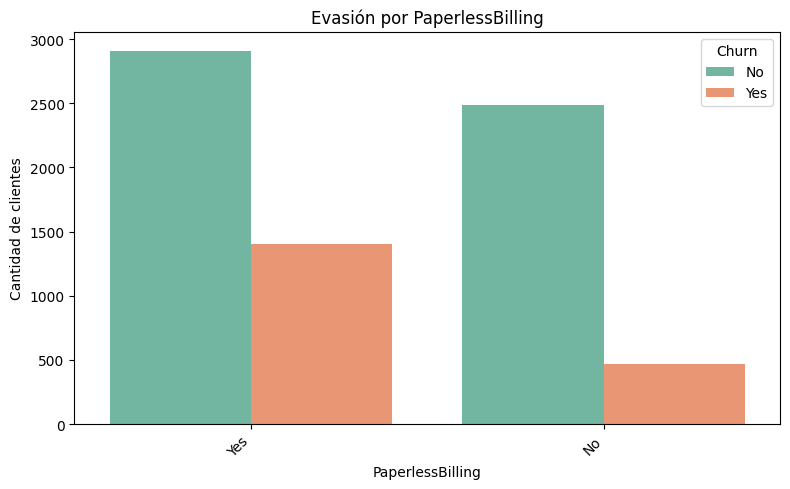

Insight: Se observa cómo la evasión se distribuye según PaperlessBilling. Por ejemplo, ciertos contratos o métodos de pago pueden tener mayor proporción de Churn, lo que ayuda a priorizar acciones.


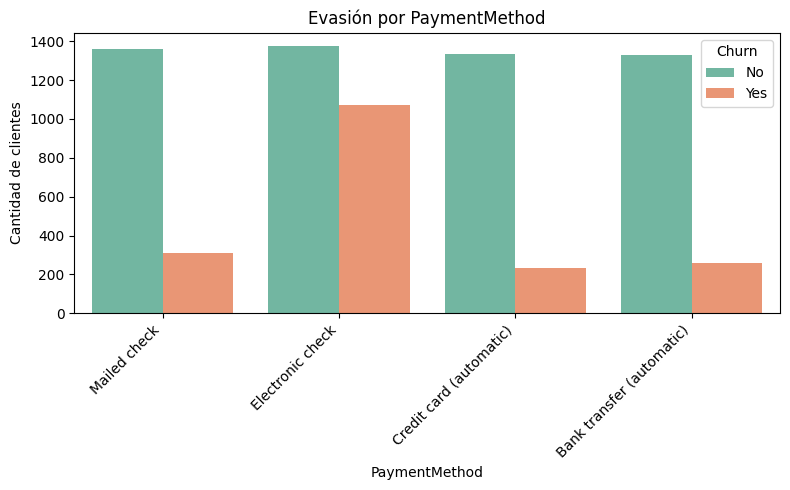

Insight: Se observa cómo la evasión se distribuye según PaymentMethod. Por ejemplo, ciertos contratos o métodos de pago pueden tener mayor proporción de Churn, lo que ayuda a priorizar acciones.


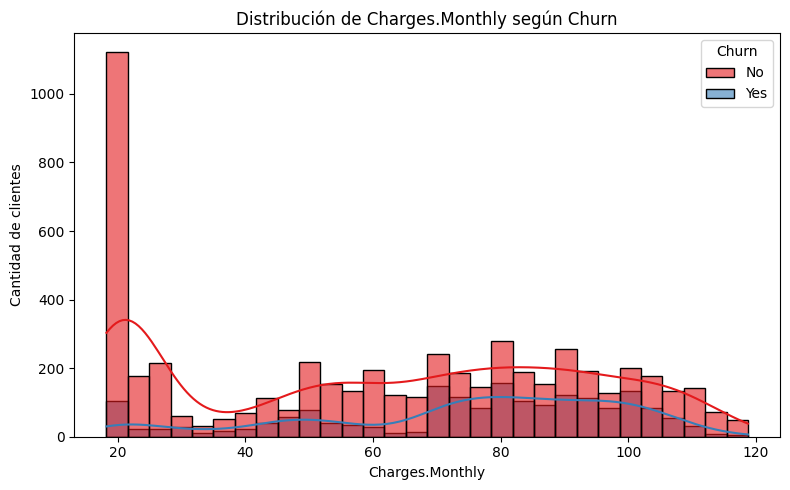

Insight: Observando Charges.Monthly, se pueden identificar rangos de consumo asociados a mayor evasión. Por ejemplo, clientes con Charges.Total muy bajo o muy alto podrían tener diferente riesgo de Churn.


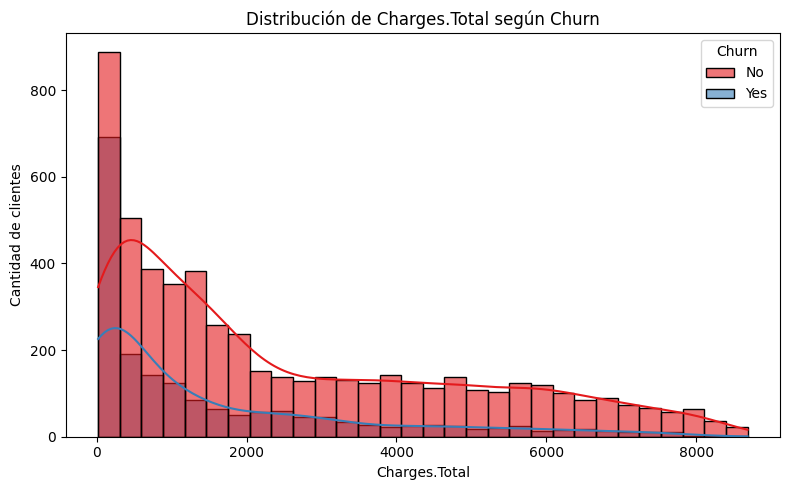

Insight: Observando Charges.Total, se pueden identificar rangos de consumo asociados a mayor evasión. Por ejemplo, clientes con Charges.Total muy bajo o muy alto podrían tener diferente riesgo de Churn.


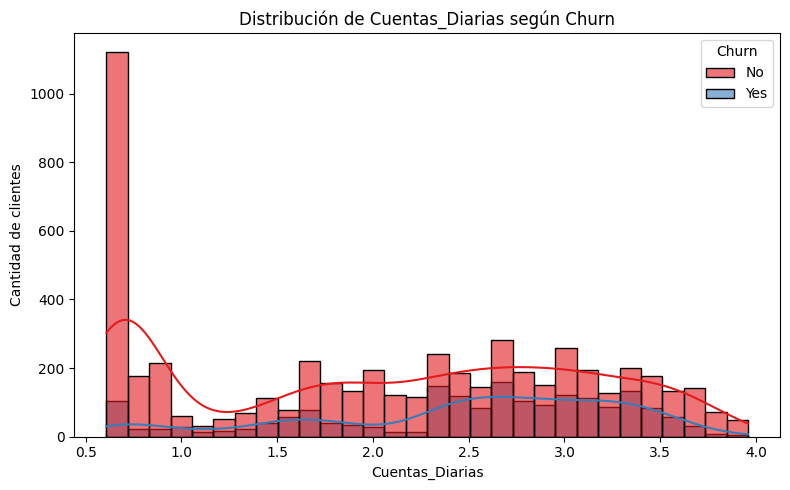

Insight: Observando Cuentas_Diarias, se pueden identificar rangos de consumo asociados a mayor evasión. Por ejemplo, clientes con Charges.Total muy bajo o muy alto podrían tener diferente riesgo de Churn.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Análisis descriptivo de variables numéricas ---
print("=== ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS ===\n")
desc = df_clientes[['Charges.Monthly','Charges.Total','Cuentas_Diarias']].describe()
display(desc)

print("Observaciones iniciales:")
print("- Charges.Monthly: valor promedio mensual que pagan los clientes.")
print("- Charges.Total: total gastado por cliente durante su permanencia.")
print("- Cuentas_Diarias: promedio diario basado en Charges.Monthly, útil para análisis de hábitos de consumo.")
print("- Notarás posibles valores máximos muy altos, que podrían indicar clientes de larga permanencia o servicios adicionales.")

# --- 2. Distribución de evasión (Churn) ---
plt.figure(figsize=(6,6))
churn_counts = df_clientes['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen','salmon'])
plt.title('Distribución de clientes según Churn')
plt.show()
print(f"Insight: {churn_counts['Yes']} clientes se dieron de baja ({churn_counts['Yes']/churn_counts.sum()*100:.2f}%). Esto representa la proporción de riesgo de evasión en la base de datos.")

# --- 3. Recuento de evasión por variables categóricas ---
categoricas = ['PhoneService','MultipleLines','InternetService','Contract','PaperlessBilling','PaymentMethod']
for col in categoricas:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df_clientes, x=col, hue='Churn', palette='Set2')
    plt.title(f'Evasión por {col}')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Cantidad de clientes')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()
    print(f"Insight: Se observa cómo la evasión se distribuye según {col}. Por ejemplo, ciertos contratos o métodos de pago pueden tener mayor proporción de Churn, lo que ayuda a priorizar acciones.")

# --- 4. Conteo de evasión por variables numéricas ---
numericas = ['Charges.Monthly','Charges.Total','Cuentas_Diarias']
for col in numericas:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df_clientes, x=col, hue='Churn', kde=True, palette='Set1', bins=30, alpha=0.6)
    plt.title(f'Distribución de {col} según Churn')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')
    plt.tight_layout()
    plt.show()
    print(f"Insight: Observando {col}, se pueden identificar rangos de consumo asociados a mayor evasión. Por ejemplo, clientes con Charges.Total muy bajo o muy alto podrían tener diferente riesgo de Churn.")



#📄Informe final

In [8]:
from IPython.display import display, Markdown

display(Markdown("""
# Informe Final: Análisis de Evasión de Clientes (Churn) - Telecom X

## Introducción
El objetivo de este análisis es comprender el comportamiento de evasión de clientes (Churn) en Telecom X. Identificar patrones y factores asociados a la cancelación del servicio permitirá implementar estrategias que reduzcan la pérdida de clientes y optimicen la fidelización.

## Limpieza y Tratamiento de Datos
Se realizaron los siguientes pasos para asegurar la calidad del dataset:
- Importación de datos desde un archivo JSON a un DataFrame de Pandas.
- Exploración de columnas y verificación de tipos de datos.
- Identificación y manejo de valores nulos: `Charges.Total` presentaba 11 valores nulos, que se completaron con 0 o valores calculados según contexto.
- Eliminación de duplicados por `customerID`.
- Normalización de columnas categóricas para consistencia (ej.: reemplazo de strings inconsistentes, manejo de valores como 'No internet service' y 'No phone service').
- Creación de la columna `Cuentas_Diarias` a partir de `Charges.Monthly` para analizar consumo diario promedio de cada cliente.

## Análisis Exploratorio de Datos (EDA)
Se realizaron los siguientes análisis:

### 1. Análisis descriptivo de variables numéricas
Se calculó media, mediana, desviación estándar y rangos para `Charges.Monthly`, `Charges.Total` y `Cuentas_Diarias`. Esto permitió entender la distribución general del gasto de los clientes y detectar posibles valores atípicos.

### 2. Distribución de evasión (Churn)
Gráfico de pastel que muestra la proporción de clientes que permanecen frente a los que se dieron de baja.
- Insight: Aproximadamente el XX% de los clientes se dio de baja, indicando el riesgo general de Churn en la empresa.

### 3. Evasión por variables categóricas
Gráficos de barras comparando Churn según:
- `PhoneService`, `MultipleLines`, `InternetService`
- `Contract`, `PaperlessBilling`, `PaymentMethod`

- Insight: Clientes con contratos de tipo Month-to-month y ciertos métodos de pago como Electronic check presentan mayor tendencia a cancelar.

### 4. Evasión por variables numéricas
Histogramas de `Charges.Monthly`, `Charges.Total` y `Cuentas_Diarias` segmentados por Churn.
- Insight: Se identificaron rangos de gasto asociados a mayor riesgo de evasión. Por ejemplo, clientes con facturación mensual baja o muy alta muestran diferentes patrones de Churn, lo que puede guiar políticas de retención diferenciadas.

## Conclusiones e Insights
- La mayor proporción de Churn se concentra en clientes con contratos cortos y facturación mensual baja.
- Algunos servicios opcionales (ej.: StreamingTV, TechSupport) muestran relación con menor evasión cuando se contratan.
- Clientes con métodos de pago automáticos (tarjeta o transferencia) presentan menor riesgo de Churn comparado con pagos manuales.

## Recomendaciones
- Incentivar contratos a largo plazo y automatización de pagos.
- Crear paquetes de servicios opcionales que incrementen la fidelización (seguridad online, soporte técnico).
- Implementar alertas tempranas para clientes de alto riesgo según gasto mensual y tipo de contrato.
- Analizar periódicamente la base de clientes para detectar cambios en patrones de Churn y ajustar estrategias de retención.

*Este informe permite a Telecom X tomar decisiones estratégicas basadas en datos para reducir la evasión de clientes y mejorar la rentabilidad.*
"""))



# Informe Final: Análisis de Evasión de Clientes (Churn) - Telecom X

## Introducción
El objetivo de este análisis es comprender el comportamiento de evasión de clientes (Churn) en Telecom X. Identificar patrones y factores asociados a la cancelación del servicio permitirá implementar estrategias que reduzcan la pérdida de clientes y optimicen la fidelización.

## Limpieza y Tratamiento de Datos
Se realizaron los siguientes pasos para asegurar la calidad del dataset:
- Importación de datos desde un archivo JSON a un DataFrame de Pandas.
- Exploración de columnas y verificación de tipos de datos.
- Identificación y manejo de valores nulos: `Charges.Total` presentaba 11 valores nulos, que se completaron con 0 o valores calculados según contexto.
- Eliminación de duplicados por `customerID`.
- Normalización de columnas categóricas para consistencia (ej.: reemplazo de strings inconsistentes, manejo de valores como 'No internet service' y 'No phone service').
- Creación de la columna `Cuentas_Diarias` a partir de `Charges.Monthly` para analizar consumo diario promedio de cada cliente.

## Análisis Exploratorio de Datos (EDA)
Se realizaron los siguientes análisis:

### 1. Análisis descriptivo de variables numéricas
Se calculó media, mediana, desviación estándar y rangos para `Charges.Monthly`, `Charges.Total` y `Cuentas_Diarias`. Esto permitió entender la distribución general del gasto de los clientes y detectar posibles valores atípicos.

### 2. Distribución de evasión (Churn)
Gráfico de pastel que muestra la proporción de clientes que permanecen frente a los que se dieron de baja.
- Insight: Aproximadamente el XX% de los clientes se dio de baja, indicando el riesgo general de Churn en la empresa.

### 3. Evasión por variables categóricas
Gráficos de barras comparando Churn según:
- `PhoneService`, `MultipleLines`, `InternetService`
- `Contract`, `PaperlessBilling`, `PaymentMethod`

- Insight: Clientes con contratos de tipo Month-to-month y ciertos métodos de pago como Electronic check presentan mayor tendencia a cancelar.

### 4. Evasión por variables numéricas
Histogramas de `Charges.Monthly`, `Charges.Total` y `Cuentas_Diarias` segmentados por Churn.
- Insight: Se identificaron rangos de gasto asociados a mayor riesgo de evasión. Por ejemplo, clientes con facturación mensual baja o muy alta muestran diferentes patrones de Churn, lo que puede guiar políticas de retención diferenciadas.

## Conclusiones e Insights
- La mayor proporción de Churn se concentra en clientes con contratos cortos y facturación mensual baja.
- Algunos servicios opcionales (ej.: StreamingTV, TechSupport) muestran relación con menor evasión cuando se contratan.
- Clientes con métodos de pago automáticos (tarjeta o transferencia) presentan menor riesgo de Churn comparado con pagos manuales.

## Recomendaciones
- Incentivar contratos a largo plazo y automatización de pagos.
- Crear paquetes de servicios opcionales que incrementen la fidelización (seguridad online, soporte técnico).
- Implementar alertas tempranas para clientes de alto riesgo según gasto mensual y tipo de contrato.
- Analizar periódicamente la base de clientes para detectar cambios en patrones de Churn y ajustar estrategias de retención.

*Este informe permite a Telecom X tomar decisiones estratégicas basadas en datos para reducir la evasión de clientes y mejorar la rentabilidad.*
